# Lead Scoring Case Study

## Step 1: Importing Required Libraries

In [172]:
# Importing the required modules

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

pd.options.display.max_columns = None

## Step 2:  Reading the data file

In [173]:
# Read the data file
leads = pd.read_csv('Leads.csv')

# Look at the first few entries
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [174]:
# Look at the shape and summary of the data
print(leads.shape)

leads.describe()

(9240, 37)


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [175]:
# Look at the columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [176]:
# Look at the info of the data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As from the shape of the data, we know there are 9240 rows but here, we can observe that some of the categorical columns have missing/null values
We may also need to create dummy variables for the categorical columns

## Step 3: Cleaning Data

### 3.1 - Handling null values and imbalance

In [177]:
# Fetch null values information
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are many columns with high number of missing/null values and these columns won't be helpful in our analysis.

Let's eiminate the columns that have null values greater than ~1/3rd of the total rows i.e. 3000

In [178]:
def validate_elminate_column(df, col):
    if df[col].isnull().sum() > 3000 :
        df.drop(col, axis=1, inplace=True)

for column in leads.columns:
    validate_elminate_column(leads, column)

# Validate the null values again
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [179]:
# Check the percentage of missing values

round(100*(leads.isnull().sum()/leads.shape[0]), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [180]:
# Check the value counts of the columns

for col in leads.columns[2:]:
    print(leads[col].astype('category').value_counts())
    print('------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
------------------------------------------------------
No     9

We can observe in some of the categorical columns with Yes/No values have majority of them assigned No. Let's drop them and prevent our analysis from skewing towards one side

In [1]:
def count_plot(data, col):
    plt.figure(figsize=(5, 3))
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=90)
    plt.show()

In [182]:
drop_cols = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
            'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque']

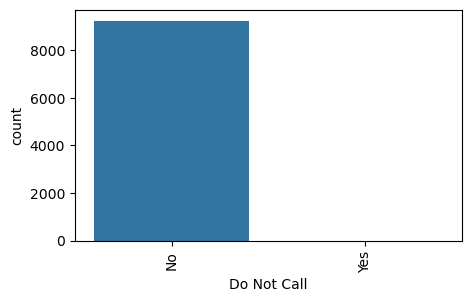

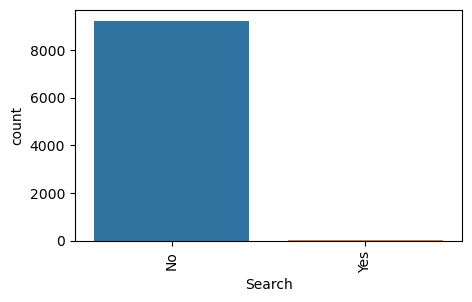

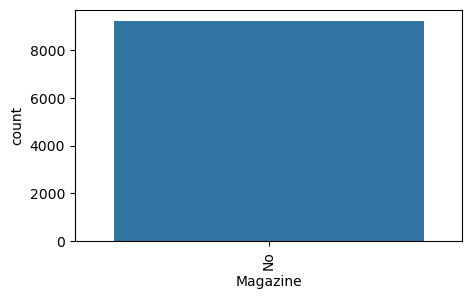

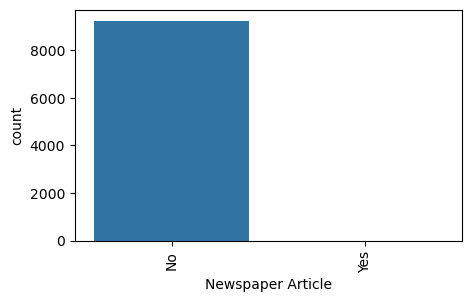

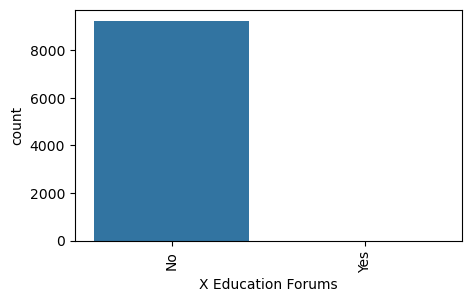

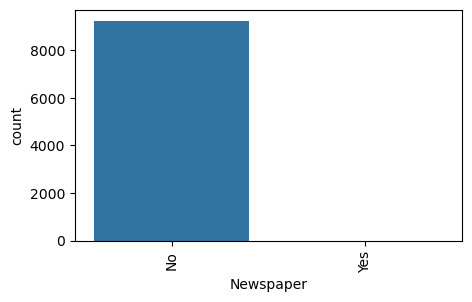

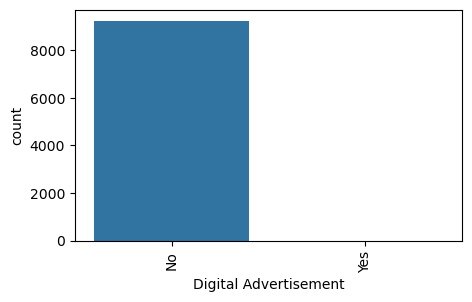

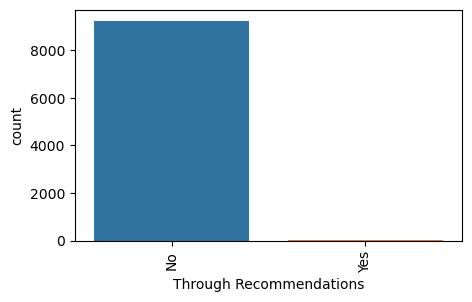

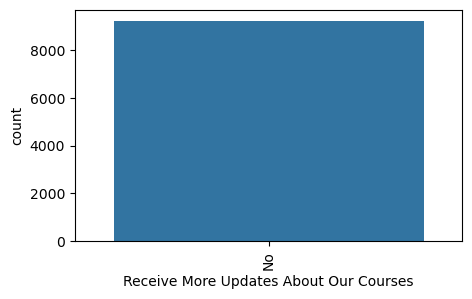

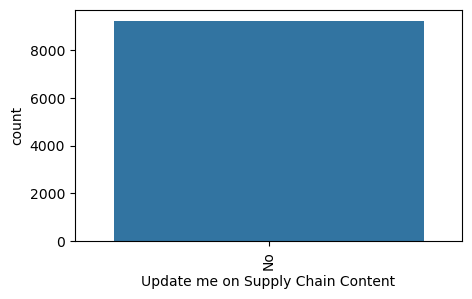

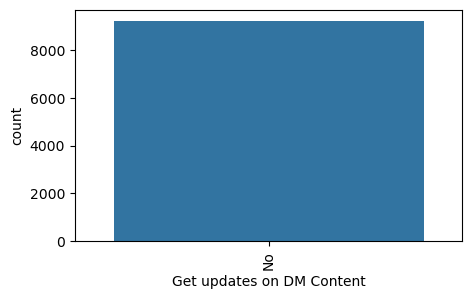

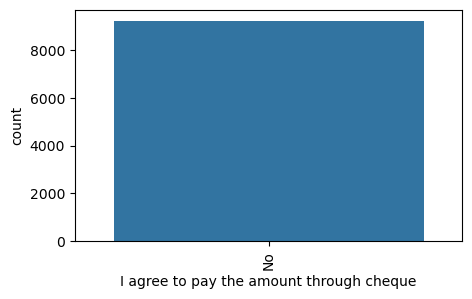

In [183]:
for column in drop_cols:
    count_plot(leads, column)

In [184]:
leads.drop(drop_cols, axis=1, inplace=True)

Null/Missing values doesn't always mean that a value should be present. Sometimes, some unhelpful value will be present.

In this case, the columns 'Lead Profile', 'How did you hear about X Education' and 'Specialization' have a value 'Select' which basically means a value has not been selected.

In [185]:
select_cols = ['Lead Profile', 'How did you hear about X Education', 'Specialization']

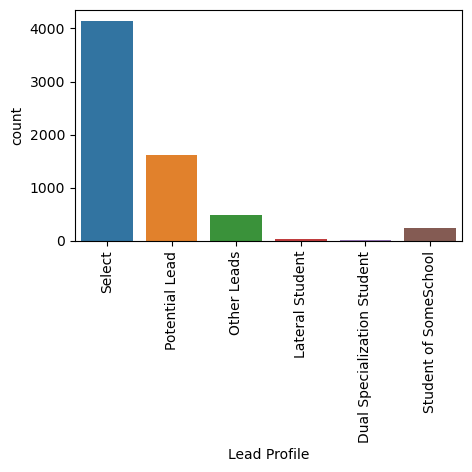

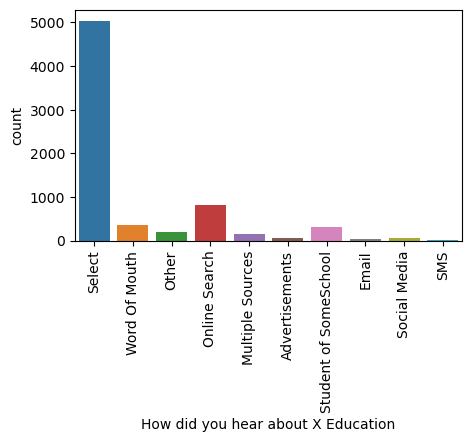

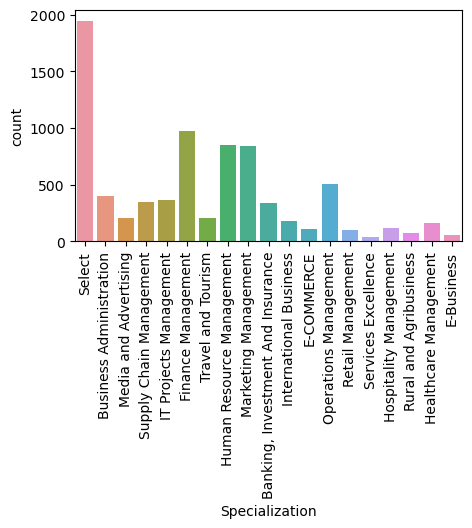

In [186]:
for column in select_cols:
    count_plot(leads, column)

In [187]:
for col in select_cols:
    print(leads[[col]].value_counts())
    print('------------------------------------------------------')

Lead Profile               
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
dtype: int64
------------------------------------------------------
How did you hear about X Education
Select                                5043
Online Search                          808
Word Of Mouth                          348
Student of SomeSchool                  310
Other                                  186
Multiple Sources                       152
Advertisements                          70
Social Media                            67
Email                                   26
SMS                                     23
dtype: int64
------------------------------------------------------
Specialization                   
Select                               1942
Finance Management                    976
Human Resource Management            

We can clearly observe that the columns 'Lead Profile' and 'How did you hear about X Education' have high number of values as Select that means they did not capture the right values and are not helpful to us.

Let's drop them

In [188]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

Even the column City have high number of 'Select' values. 
And columns City and Country won't help much in the analysis of Lead Conversion. So, let's drop them.

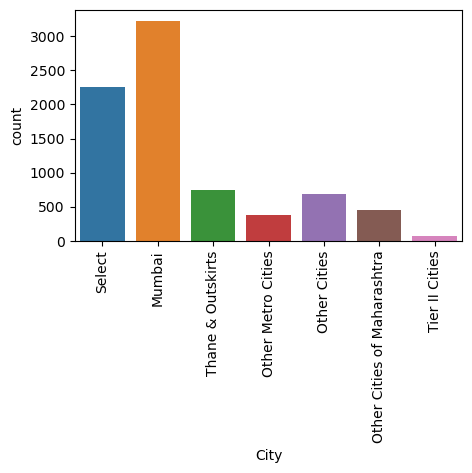

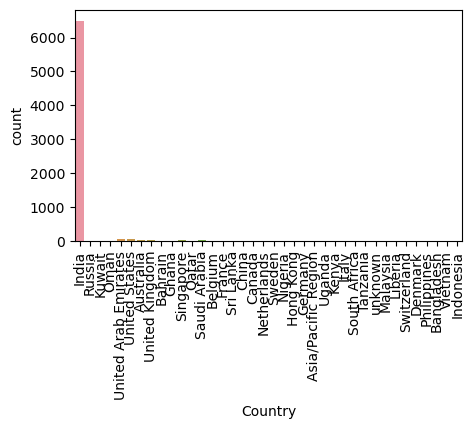

In [189]:
for column in ['City', 'Country']:
    count_plot(leads, column)

In [190]:
leads.drop(['City', 'Country'], axis=1, inplace=True)

Also, the column 'What matters most to you in choosing a course' has skewed data and hence we should drop it.

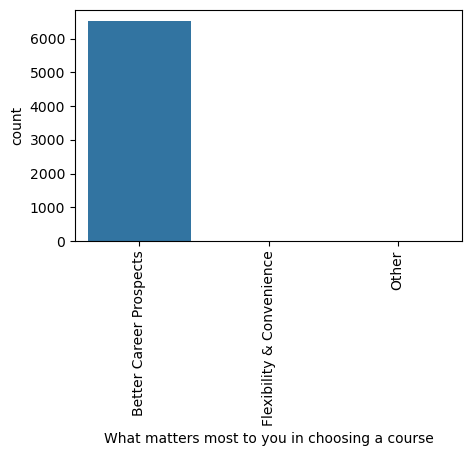

In [191]:
count_plot(leads, 'What matters most to you in choosing a course')

In [192]:
leads.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [193]:
# Let's check the shape again after cleaning
leads.shape

(9240, 14)

In [194]:
# Let's check 'What is your current occupation' column
leads['What is your current occupation'].isnull().sum()

2690

In [195]:
round(leads['What is your current occupation'].value_counts(normalize=True), 2)* 100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

We can see around 1% of the values are Null/Missing.

As, Unemployed is mostly used, let's replace the missing values with the same.

In [196]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN, leads['What is your current occupation'].value_counts().index[0])

In [197]:
leads['What is your current occupation'].isnull().sum()

0

In [198]:
round(leads['What is your current occupation'].value_counts(normalize=True), 2)* 100

Unemployed              90.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

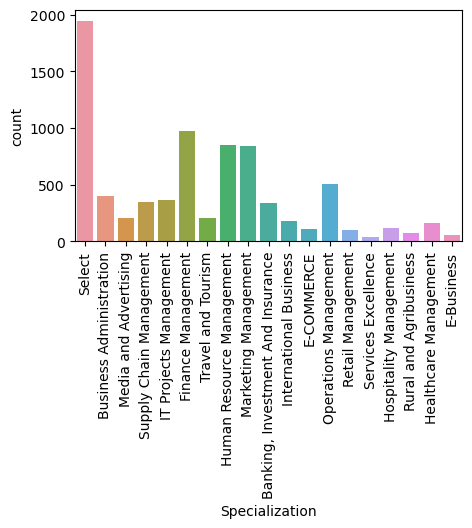

In [199]:
count_plot(leads, 'Specialization')

In [200]:
# Let's look at 'Specialization' field
round(leads['Specialization'].value_counts(normalize=True), 2)* 100

Select                               25.0
Finance Management                   13.0
Human Resource Management            11.0
Marketing Management                 11.0
Operations Management                 6.0
Business Administration               5.0
IT Projects Management                5.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

There are about 25% values as Select i.e. the leads have not selected any Specialization. Since the number is huge, instead of eliminating those rows let's create another value 'Others'

In [201]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

Also, the fields/features 'Prospect ID', 'Lead Number' do not help us in analysis, let's get rid of them.

In [202]:
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [203]:
# Checking the Null/Missing values again
round(leads.isnull().sum()/len(leads.index),2)*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               1.0
Total Time Spent on Website               0.0
Page Views Per Visit                      1.0
Last Activity                             1.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [204]:
# Let's look at 'TotalVisits' Null/Missing values
leads['TotalVisits'].isnull().sum()

137

Since 'TotalVisits' captures the total number of visits made by the customer on the website. Having null values doesn't make sense.
Let's delete those rows

In [205]:
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [206]:
# Let's look at 'TotalVisits' Null/Missing values
leads['TotalVisits'].isnull().sum()

0

Now, we do not have any Null/Missing vlue in our data

In [207]:
# Let's percentage of rows retained 
(len(leads.index)/9240)*100

98.51731601731602

We have retained 98.5% of the rows after cleaning the data

### 3.3 - Handling Outliers

In [208]:
def box_plot(df, col):
    plt.figure(figsize = (5,3))
    sns.boxplot(df[col])

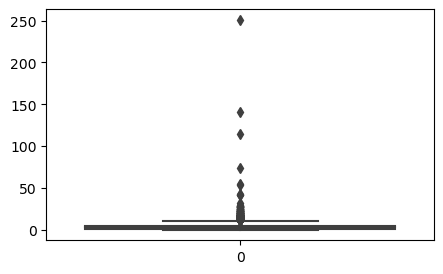

In [209]:
box_plot(leads, 'TotalVisits')

In [210]:
leads['TotalVisits'].describe(percentiles=[0.05, .25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

From the observation, there are so many outliers and the values at 99% and above are extreme. Let's cap the value to 95%

In [211]:
leads = leads[(leads['TotalVisits'] <= leads['TotalVisits'].quantile(0.95))]

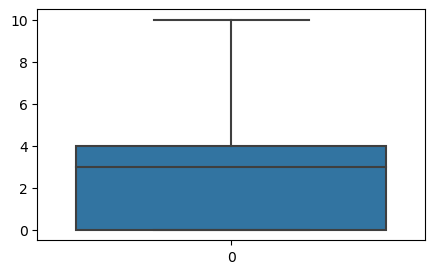

In [212]:
# Let's check the outliers again
box_plot(leads, 'TotalVisits')

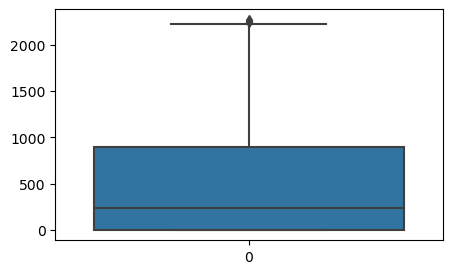

In [213]:
box_plot(leads, 'Total Time Spent on Website')

The values in 'Total Time Spent on Website' looks good and there seems to be negligible outliers

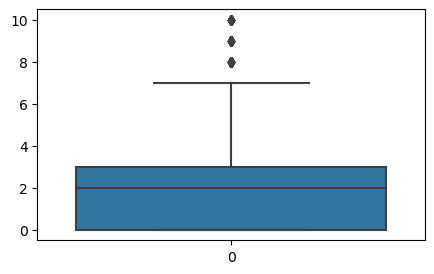

In [214]:
box_plot(leads, 'Page Views Per Visit')

In [215]:
leads['Page Views Per Visit'].describe(percentiles=[0.05, .25, .5, .75, .90, .95, .99])

count    8750.000000
mean        2.248421
std         1.923434
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

Let's cap 'Page Views Per Visit' to 95% as well

In [216]:
leads = leads[(leads['Page Views Per Visit'] <= leads['Page Views Per Visit'].quantile(0.95))]

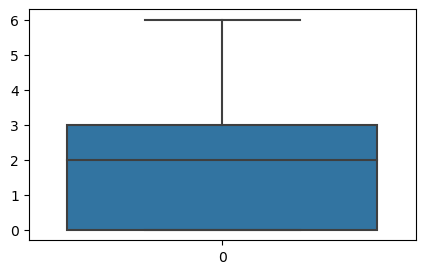

In [217]:
box_plot(leads, 'Page Views Per Visit')

## Step 4: Exploratory Data Analysis

Let's observe the data distribution with respect our target variable 'Converted'

### 4.1 - Continuous variabes vs target variable

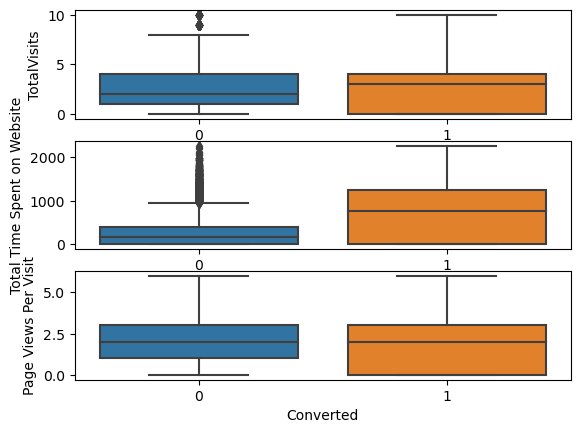

In [218]:
plt.subplot(3,1,1)
sns.boxplot(data =leads, x = 'Converted', y = 'TotalVisits')

plt.subplot(3,1,2)
sns.boxplot(data =leads, x = 'Converted', y = 'Total Time Spent on Website')

plt.subplot(3,1,3)
sns.boxplot(data =leads, x = 'Converted', y = 'Page Views Per Visit')

plt.show()

- Total Visits and Page Views per Visit are similar irrespective of whether the Leads are converted or not
- Leads spending more time on the weblise are more likely to be converted

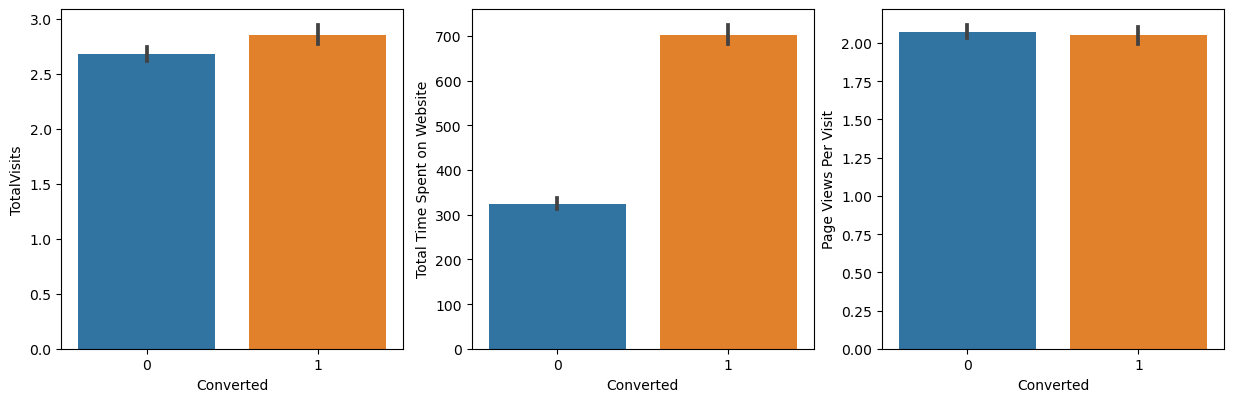

In [219]:
# Getting barplots of continuous variables vs target variable
plt.figure(figsize=(15, 15))
for column in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(3,3,column[0]+1)
    sns.barplot(data=leads, x='Converted', y=column[1])
plt.show()

### 4.2 - Categorical variables vs target variable

In [220]:
def count_plot_with_target(data, col, target='Converted'):
    plt.figure(figsize=(5, 3))
    sns.countplot(data=data, x=col, hue=target)
    plt.xticks(rotation=90)
    plt.show()

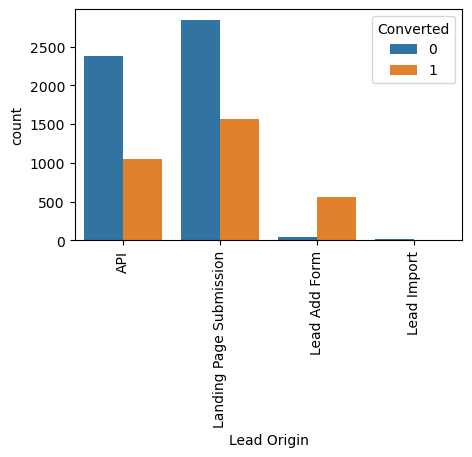

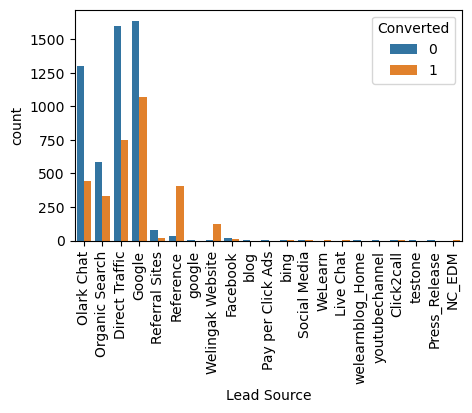

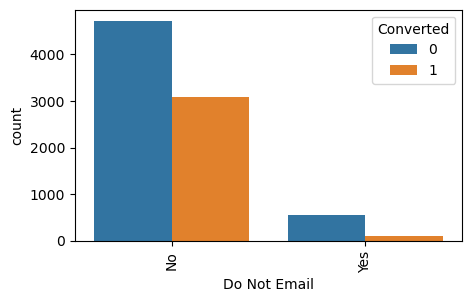

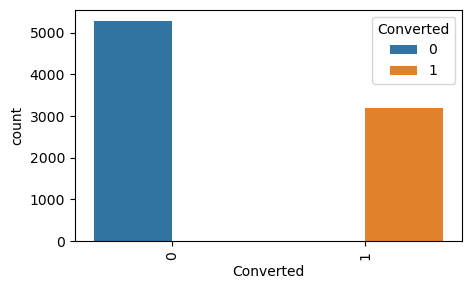

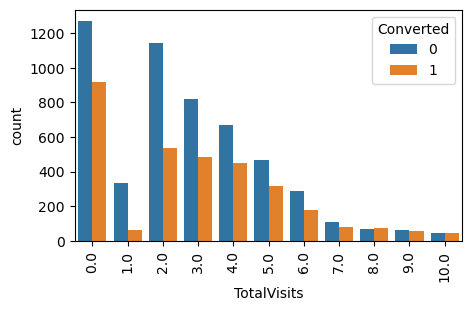

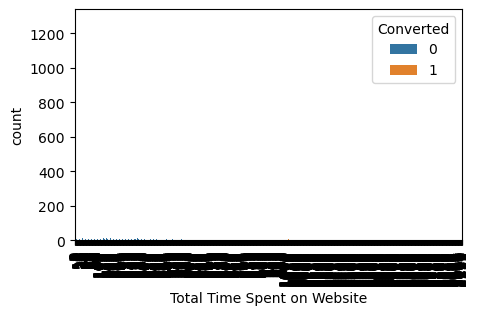

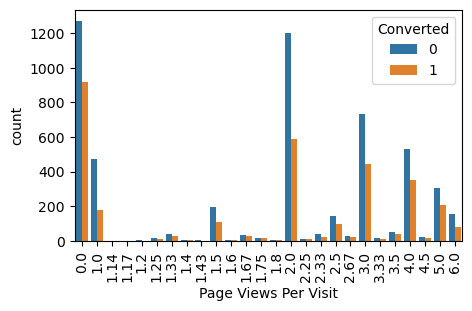

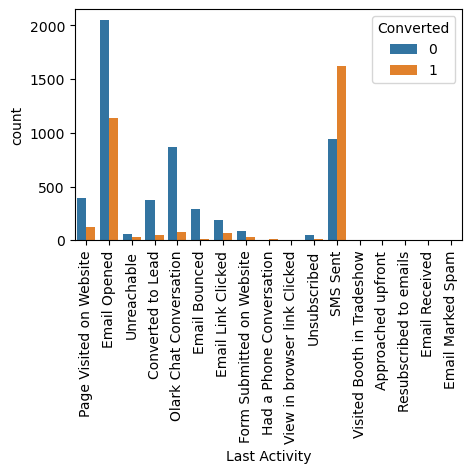

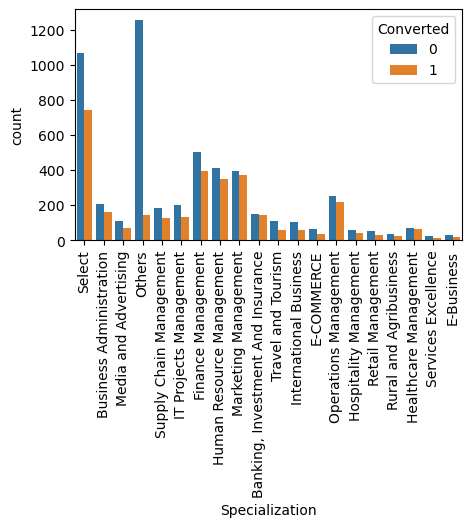

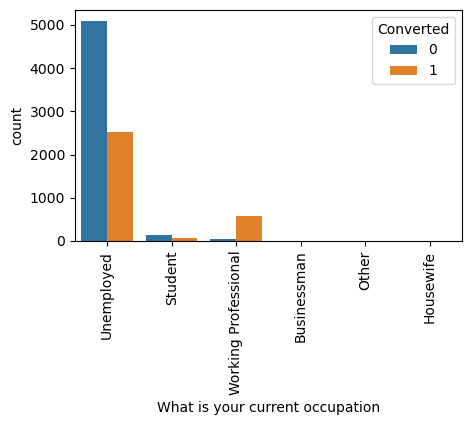

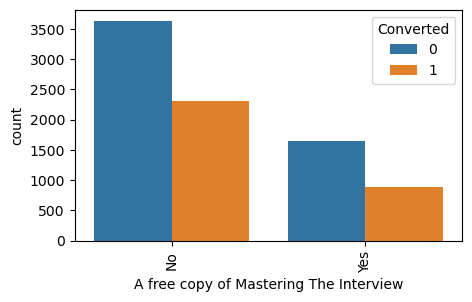

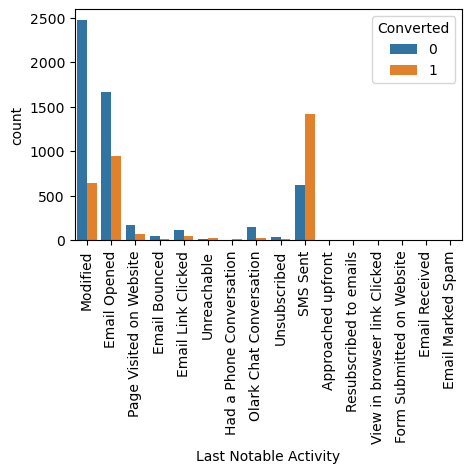

In [221]:
for column in leads.columns:
    count_plot_with_target(leads, column)

#### Insights
- Most of the lead have their Email opened as their last activity
- Conversion rate for leads with last activity as SMS Sent is almost 60%
- Working Professionals going for the course have high chances of joining it
- Unemployed leads are the most in numbers but has around 50% conversion rate

Based on the univariate analysis we can drop 'A free copy of Mastering The Interview' for further analysis

In [222]:
leads.drop(['A free copy of Mastering The Interview'], axis=1, inplace=True)

### 4.3 - Using pair plots to check relationship between variables and target variable

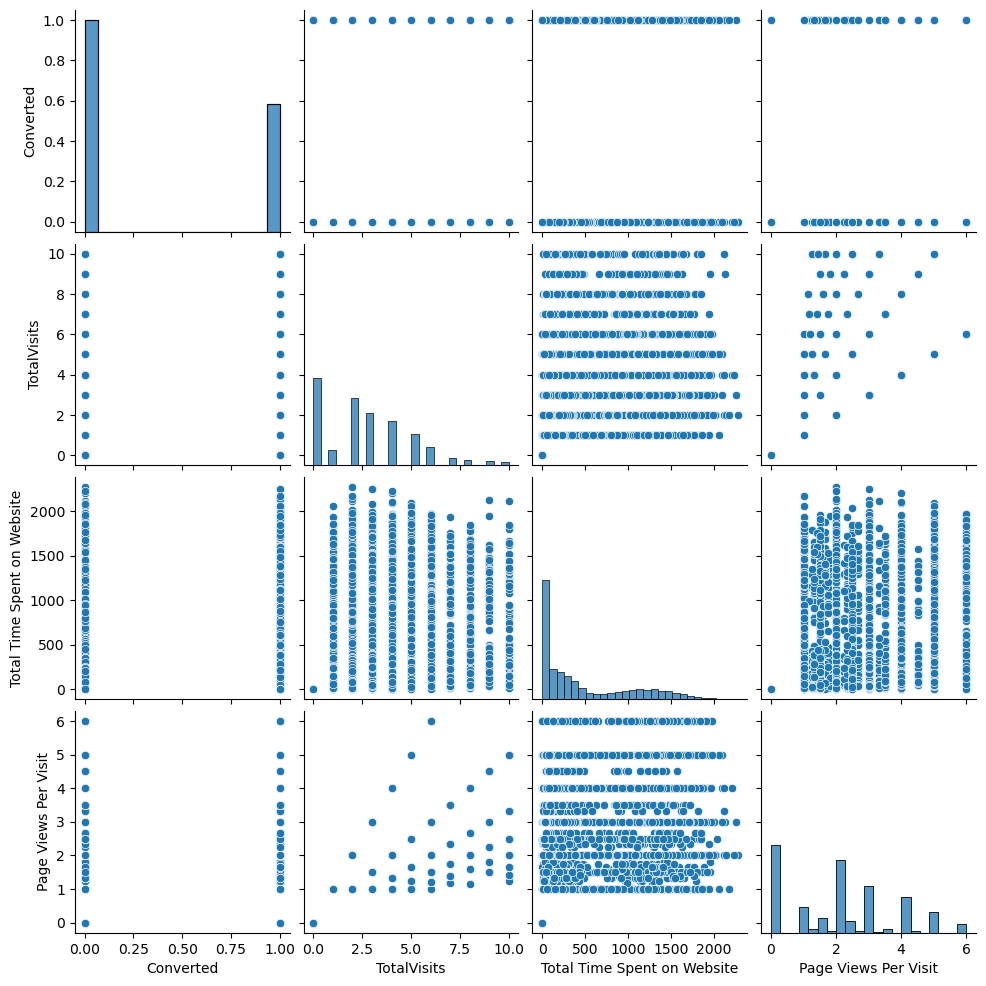

In [223]:
sns.pairplot(data=leads)
plt.show()

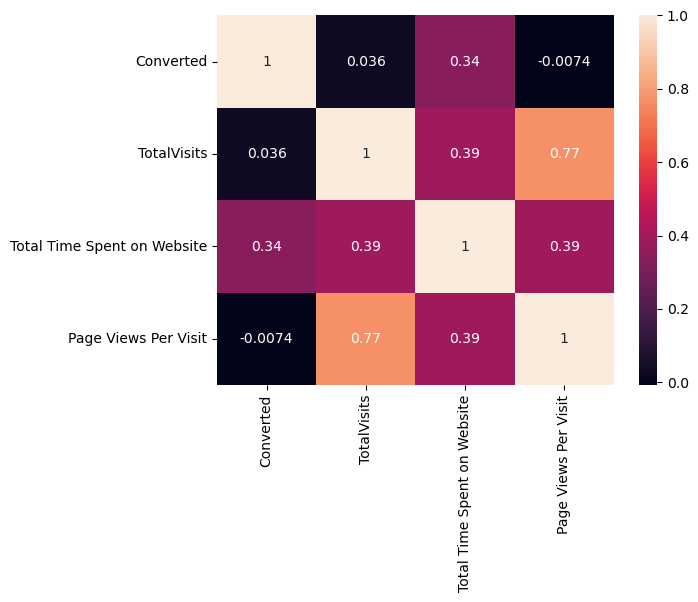

In [224]:
sns.heatmap(leads.corr(), annot = True)
plt.show()

## Step 5 - Data Preparation

### 5.1 - Creating response flags (0/1) for binary variables 

In [225]:
# Converting Yes/No to 1/0
binary_variables =  ['Do Not Email']

def convert_binary(x):
    return x.map({'Yes': 1, "No": 0})

leads[binary_variables] = leads[binary_variables].apply(convert_binary)

### 5.2 - Creating dummy variable for categorical variables

In [226]:
categorical_variables = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'Last Notable Activity']

In [227]:
# Let's create Dummy Variables for Categorical Variables
dummy_variables = pd.get_dummies(leads[categorical_variables], drop_first=True)

In [228]:
dummy_variables.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [229]:
# Merging the two dataframes
leads = pd.concat([leads, dummy_variables], axis=1)

In [230]:
leads = leads[~pd.isnull(leads)]

In [231]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0

In [232]:
# Dropping the original columns
leads.drop(categorical_variables, axis = 1, inplace = True)

### 5.3 - Split the data into Train and Test set

In [233]:
# Storing target variable in y
y = leads['Converted']

# Storing feature variables in X
X = leads.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### 5.4 - Feature Scaling

In [234]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
        X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [235]:
# Checking the Lead Conversion rate
converted = (sum(y)/len(y.index))*100
converted

37.65636063252301

We have almost 38% lead conversion rate.

In [236]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8474 non-null   int64  
 1   TotalVisits                                           8474 non-null   float64
 2   Total Time Spent on Website                           8474 non-null   int64  
 3   Page Views Per Visit                                  8474 non-null   float64
 4   Lead Origin_Landing Page Submission                   8474 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8474 non-null   uint8  
 6   Lead Origin_Lead Import                               8474 non-null   uint8  
 7   Lead Source_Direct Traffic                            8474 non-null   uint8  
 8   Lead Source_Facebook                                  8474

## Step 6: Model Building

### Feature Selection

Let's use RFE for feature selection

In [237]:
logistic_regression = LogisticRegression()

# Let's select 15 features
rfe = RFE(estimator=logistic_regression, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [238]:
rfe.support_

array([ True, False, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False])

In [239]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 41),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release', False, 64),
 ('Lead Source_Reference', False, 50),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_blog', False, 16),
 ('Lead Source_google', False, 23),
 ('Lead Source_testone', False, 65),
 ('Lead Source_welear

In [240]:
featured_columns = X_train.columns[rfe.support_]
featured_columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 1

In [241]:
X_train_sm = sm.add_constant(X_train[featured_columns])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.7
Date:                Sat, 16 Dec 2023   Deviance:                       5651.3
Time:                        14:52:39   Pearson chi2:                 5.85e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5847      0.089     -6.536      0.000      -0.760      -0.409
Do Not Email                                            -1.2869      0.186     -6.902      0.000      -1.652      -0.921
Lead Origin_Lead Add Form                                2.1888      0.231      9.459      0.000       1.735       2.642
Lead Source_Direct Traffic                              -0.6345      0.106     -6.012      0.000      -0.841      -0.428
Lead Source_Google                                      -0.2160      0.099     -2.171      0.030      -0.411      -0.021
Lead Source_Organic Search                              -0.3284      0.125     -2.626      0.009      -0.574      -0.083
Lead Source_Referral Sites                              -0.3010      0.326     -0.923      0.356      -0.940       0.338
Lead Source_Welingak Website                             2.4715      1.033      2.393      0.017       0.447       4.495
Last Activity_Email Bounced                             -1.8825      0.614     -3.068      0.002      -3.085      -0.680
Last Activity_Olark Chat Conversation                   -1.5362      0.174     -8.811      0.000      -1.878      -1.194
Specialization_Others                                   -1.2158      0.121    -10.082      0.000      -1.452      -0.979
What is your current occupation_Housewife               22.2278   1.13e+04      0.002      0.998   -2.21e+04    2.21e+04
What is your current occupation_Working Professional     2.5706      0.177     14.538      0.000       2.224       2.917
Last Notable Activity_Email Bounced                      2.3093      0.753      3.067      0.002       0.833       3.785
Last Notable Activity_SMS Sent                           1.6161      0.075     21.500      0.000       1.469       1.763
Last Notable Activity_Unreachable                        1.8488      0.544      3.400      0.001       0.783       2.915
========================================================================================================================
"""

Since P-value of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [242]:
featured_columns1 = featured_columns.drop('What is your current occupation_Housewife')

### Model 2

In [243]:
### Model 2X_train_sm = sm.add_constant(X_train[featured_columns1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2832.2
Date:                Sat, 16 Dec 2023   Deviance:                       5664.3
Time:                        14:52:39   Pearson chi2:                 5.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3084
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5818      0.089     -6.507      0.000      -0.757      -0.407
Do Not Email                                            -1.2898      0.186     -6.920      0.000      -1.655      -0.924
Lead Origin_Lead Add Form                                2.1951      0.231      9.492      0.000       1.742       2.648
Lead Source_Direct Traffic                              -0.6321      0.105     -5.993      0.000      -0.839      -0.425
Lead Source_Google                                      -0.2126      0.099     -2.139      0.032      -0.407      -0.018
Lead Source_Organic Search                              -0.3165      0.125     -2.536      0.011      -0.561      -0.072
Lead Source_Referral Sites                              -0.3021      0.326     -0.926      0.354      -0.941       0.337
Lead Source_Welingak Website                             2.4642      1.033      2.386      0.017       0.440       4.488
Last Activity_Email Bounced                             -1.8860      0.614     -3.074      0.002      -3.089      -0.683
Last Activity_Olark Chat Conversation                   -1.5391      0.174     -8.830      0.000      -1.881      -1.197
Specialization_Others                                   -1.2190      0.121    -10.114      0.000      -1.455      -0.983
What is your current occupation_Working Professional     2.5660      0.177     14.512      0.000       2.219       2.913
Last Notable Activity_Email Bounced                      2.3100      0.753      3.068      0.002       0.834       3.786
Last Notable Activity_SMS Sent                           1.6099      0.075     21.431      0.000       1.463       1.757
Last Notable Activity_Unreachable                        1.8432      0.544      3.389      0.001       0.777       2.909
========================================================================================================================
"""

Since P-value of 'Lead Source_Referral Sites' is very high, we can drop this column.

In [244]:
featured_columns2 = featured_columns1.drop('Lead Source_Referral Sites')

### Model 3

In [245]:
### Model 3X_train_sm = sm.add_constant(X_train[featured_columns2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5917
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2832.6
Date:                Sat, 16 Dec 2023   Deviance:                       5665.2
Time:                        14:52:39   Pearson chi2:                 5.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3083
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6021      0.087     -6.933      0.000      -0.772      -0.432
Do Not Email                                            -1.2901      0.186     -6.922      0.000      -1.655      -0.925
Lead Origin_Lead Add Form                                2.2148      0.230      9.616      0.000       1.763       2.666
Lead Source_Direct Traffic                              -0.6127      0.103     -5.922      0.000      -0.815      -0.410
Lead Source_Google                                      -0.1933      0.097     -1.987      0.047      -0.384      -0.003
Lead Source_Organic Search                              -0.2973      0.123     -2.415      0.016      -0.539      -0.056
Lead Source_Welingak Website                             2.4637      1.033      2.386      0.017       0.440       4.488
Last Activity_Email Bounced                             -1.8824      0.613     -3.069      0.002      -3.085      -0.680
Last Activity_Olark Chat Conversation                   -1.5303      0.174     -8.796      0.000      -1.871      -1.189
Specialization_Others                                   -1.2162      0.120    -10.099      0.000      -1.452      -0.980
What is your current occupation_Working Professional     2.5646      0.177     14.503      0.000       2.218       2.911
Last Notable Activity_Email Bounced                      2.3027      0.753      3.060      0.002       0.828       3.778
Last Notable Activity_SMS Sent                           1.6125      0.075     21.479      0.000       1.465       1.760
Last Notable Activity_Unreachable                        1.8320      0.544      3.365      0.001       0.765       2.899
========================================================================================================================
"""

Since P-value of 'Lead Source_Google' is very high, we can drop this column.

In [246]:
featured_columns3 = featured_columns2.drop('Lead Source_Google')

### Model 4

In [247]:
### Model 4X_train_sm = sm.add_constant(X_train[featured_columns3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5918
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.6
Date:                Sat, 16 Dec 2023   Deviance:                       5669.2
Time:                        14:52:39   Pearson chi2:                 5.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7409      0.052    -14.215      0.000      -0.843      -0.639
Do Not Email                                            -1.2929      0.186     -6.942      0.000      -1.658      -0.928
Lead Origin_Lead Add Form                                2.3530      0.220     10.711      0.000       1.922       2.784
Lead Source_Direct Traffic                              -0.4744      0.077     -6.187      0.000      -0.625      -0.324
Lead Source_Organic Search                              -0.1628      0.103     -1.582      0.114      -0.365       0.039
Lead Source_Welingak Website                             2.4601      1.032      2.383      0.017       0.437       4.483
Last Activity_Email Bounced                             -1.8635      0.613     -3.041      0.002      -3.064      -0.663
Last Activity_Olark Chat Conversation                   -1.4660      0.171     -8.583      0.000      -1.801      -1.131
Specialization_Others                                   -1.1610      0.117     -9.930      0.000      -1.390      -0.932
What is your current occupation_Working Professional     2.5544      0.177     14.463      0.000       2.208       2.901
Last Notable Activity_Email Bounced                      2.2954      0.751      3.056      0.002       0.823       3.767
Last Notable Activity_SMS Sent                           1.6117      0.075     21.482      0.000       1.465       1.759
Last Notable Activity_Unreachable                        1.8388      0.546      3.370      0.001       0.769       2.908
========================================================================================================================
"""

Since P-value of 'Lead Source_Organic Search' is very high, we can drop this column.

In [248]:
featured_columns4 = featured_columns3.drop('Lead Source_Organic Search')

### Model 5

In [249]:
### Model 5X_train_sm = sm.add_constant(X_train[featured_columns4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5919
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2835.8
Date:                Sat, 16 Dec 2023   Deviance:                       5671.7
Time:                        14:52:39   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7726      0.048    -16.014      0.000      -0.867      -0.678
Do Not Email                                            -1.2993      0.186     -6.983      0.000      -1.664      -0.935
Lead Origin_Lead Add Form                                2.3858      0.219     10.908      0.000       1.957       2.815
Lead Source_Direct Traffic                              -0.4414      0.074     -5.980      0.000      -0.586      -0.297
Lead Source_Welingak Website                             2.4592      1.032      2.382      0.017       0.436       4.482
Last Activity_Email Bounced                             -1.8706      0.612     -3.055      0.002      -3.071      -0.671
Last Activity_Olark Chat Conversation                   -1.4451      0.170     -8.487      0.000      -1.779      -1.111
Specialization_Others                                   -1.1502      0.117     -9.849      0.000      -1.379      -0.921
What is your current occupation_Working Professional     2.5586      0.177     14.483      0.000       2.212       2.905
Last Notable Activity_Email Bounced                      2.3062      0.750      3.074      0.002       0.836       3.777
Last Notable Activity_SMS Sent                           1.6072      0.075     21.454      0.000       1.460       1.754
Last Notable Activity_Unreachable                        1.8430      0.546      3.377      0.001       0.773       2.913
========================================================================================================================
"""

In [250]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[featured_columns4].columns
vif['VIF'] = [variance_inflation_factor(X_train[featured_columns4].values, i) for i in range(X_train[featured_columns4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_Email Bounced,1.97
0,Do Not Email,1.81
1,Lead Origin_Lead Add Form,1.44
3,Lead Source_Welingak Website,1.31
6,Specialization_Others,1.26
5,Last Activity_Olark Chat Conversation,1.25
8,Last Notable Activity_Email Bounced,1.23
9,Last Notable Activity_SMS Sent,1.22
2,Lead Source_Direct Traffic,1.16
7,What is your current occupation_Working Profes...,1.15


In [251]:
# Dropping the column 'Lead Source_Welingak Website'
featured_columns5 = featured_columns4.drop('Lead Source_Welingak Website')


### Model 6

In [252]:
X_train_sm = sm.add_constant(X_train[featured_columns5])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5920
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2841.8
Date:                Sat, 16 Dec 2023   Deviance:                       5683.5
Time:                        14:52:39   Pearson chi2:                 5.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7736      0.048    -16.036      0.000      -0.868      -0.679
Do Not Email                                            -1.3017      0.186     -7.008      0.000      -1.666      -0.938
Lead Origin_Lead Add Form                                2.7170      0.211     12.906      0.000       2.304       3.130
Lead Source_Direct Traffic                              -0.4410      0.074     -5.976      0.000      -0.586      -0.296
Last Activity_Email Bounced                             -1.8668      0.612     -3.050      0.002      -3.066      -0.667
Last Activity_Olark Chat Conversation                   -1.4357      0.169     -8.476      0.000      -1.768      -1.104
Specialization_Others                                   -1.1511      0.117     -9.857      0.000      -1.380      -0.922
What is your current occupation_Working Professional     2.5495      0.177     14.416      0.000       2.203       2.896
Last Notable Activity_Email Bounced                      2.3498      0.742      3.166      0.002       0.895       3.804
Last Notable Activity_SMS Sent                           1.6097      0.075     21.492      0.000       1.463       1.756
Last Notable Activity_Unreachable                        1.8417      0.546      3.372      0.001       0.771       2.912
========================================================================================================================
"""

In [253]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[featured_columns5].columns
vif['VIF'] = [variance_inflation_factor(X_train[featured_columns5].values, i) for i in range(X_train[featured_columns5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Last Activity_Email Bounced,1.97
0,Do Not Email,1.81
5,Specialization_Others,1.26
4,Last Activity_Olark Chat Conversation,1.24
7,Last Notable Activity_Email Bounced,1.23
8,Last Notable Activity_SMS Sent,1.22
2,Lead Source_Direct Traffic,1.16
6,What is your current occupation_Working Profes...,1.13
1,Lead Origin_Lead Add Form,1.12
9,Last Notable Activity_Unreachable,1.00


Since P-values and VIF are in acceptable range, we can move ahead with Model 6

## Step 7: Prediction

In [254]:
# Predicting values based on x-values of the train dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred

4329    0.315701
5793    0.997768
435     0.315701
8958    0.228886
4266    0.421896
          ...   
403     0.315701
90      0.315701
8777    0.098921
7568    0.228886
6164    0.315701
Length: 5931, dtype: float64

In [255]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.31570122, 0.99776782, 0.31570122, ..., 0.098921  , 0.22888625,
       0.31570122])

In [256]:
# Creating a dataframe with given convertion rate and the predicted probablity of conversion
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,1,0.315701
1,1,0.997768
2,0,0.315701
3,0,0.228886
4,1,0.421896


In [257]:
# Setting cut off as 0.4
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,1,0.315701,0
1,1,0.997768,1
2,0,0.315701,0
3,0,0.228886,0
4,1,0.421896,1


## Step 8: Model Evaluation

### 8.1 - Model evaluation through metrics

In [258]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3278  425]
 [ 879 1349]]


|Column 1     |Column 2     |Column 3 |
|:-----------:|:-----------:|:-------:|
|Predicted →  |Not Converted|Converted|      
|Actual  ↓    |             |         |
|Not Converted|3278         |425      |
|Converted    |879          |1349     |

In [259]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.780138256617771


Our model has 78% accuracy, which is a decent value.

Checking metrics other than Accuracy

In [260]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [261]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.605475763016158
Specificity :  0.8852281933567377
False Positive Rate : 0.11477180664326223
Positive Predictive Value : 0.7604284103720406
Negative predictive value : 0.7885494346884773


Specificity achieved is quite good (~88.5%) but Sensitivity is only 60.5%. There is a room for improvement here.

Since cut-off point of 0.4 was arbitrarily chosen, this cut-off point can be optimised to get a decent values.

Let's use the ROC curve.

In [262]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [263]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

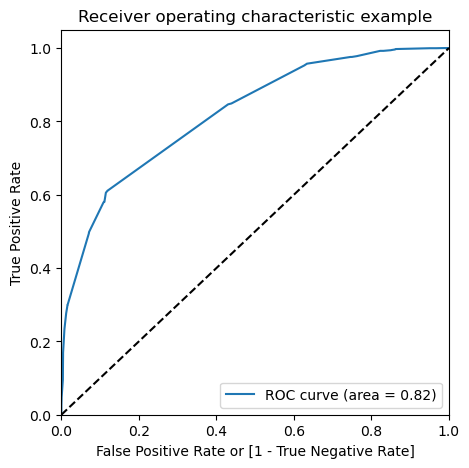

In [264]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

We have a good area (0.89) under the ROC curve, therefore our model is a good.

### 8.2 - Finding Optimal Cutoff Point

In [265]:
cut_offs = [x/10 for x in range(10)]

for cut_off in cut_offs:
    y_train_pred_final[cut_off]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > cut_off else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.315701,0,1,1,1,1,0,0,0,0,0,0
1,1,0.997768,1,1,1,1,1,1,1,1,1,1,1
2,0,0.315701,0,1,1,1,1,0,0,0,0,0,0
3,0,0.228886,0,1,1,1,0,0,0,0,0,0,0
4,1,0.421896,1,1,1,1,1,1,0,0,0,0,0


In [266]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for cut_off in cut_offs:
    conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[cut_off])
    total=sum(sum(conf_matrix))

    accuracy = (conf_matrix[0,0] + conf_matrix[1,1])/total
    
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])

    precision = conf_matrix[1,1]/(conf_matrix[0,1]+conf_matrix[1,1])
    recall = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])

    cutoff_df.loc[cut_off] =[ cut_off, accuracy, sensitivity, specificity, precision, recall]

cutoff_df

,Probability,Accuracy,Sensitivity,Specificity,Precision,Recall
0.0,0.0,0.375653,1.000000,0.000000,0.375653,1.000000
0.1,0.1,0.515596,0.978007,0.237375,0.435539,0.978007
0.2,0.2,0.590288,0.953321,0.371861,0.477303,0.953321
0.3,0.3,0.673748,0.846499,0.569808,0.542110,0.846499
0.4,0.4,0.780138,0.605476,0.885228,0.760428,0.605476
0.5,0.5,0.773563,0.580790,0.889549,0.759836,0.580790
0.6,0.6,0.766987,0.498654,0.928436,0.807413,0.498654
0.7,0.7,0.726859,0.299372,0.984067,0.918733,0.299372
0.8,0.8,0.720283,0.275583,0.987848,0.931715,0.275583
0.9,0.9,0.684539,0.167415,0.995679,0.958869,0.167415


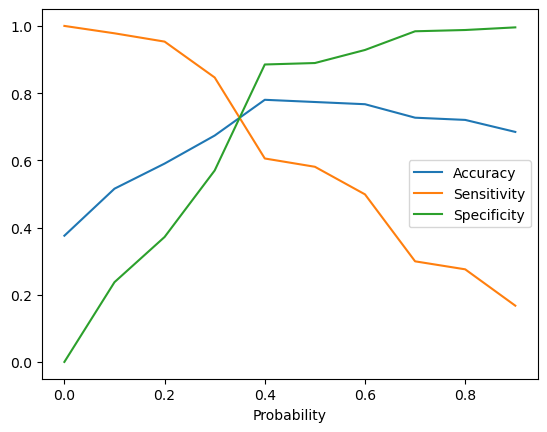

In [267]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [268]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.315701,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.997768,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.315701,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.228886,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.421896,1,1,1,1,1,1,0,0,0,0,0,1


In [269]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.315701,0,1,1,1,1,0,0,0,0,0,0,0,32
1,1,0.997768,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.315701,0,1,1,1,1,0,0,0,0,0,0,0,32
3,0,0.228886,0,1,1,1,0,0,0,0,0,0,0,0,23
4,1,0.421896,1,1,1,1,1,1,0,0,0,0,0,1,42


In [270]:
# Let's check the overall accuracy.
print("Accuracy:",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy: 0.7794638340920587


In [271]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3260,  443],
       [ 865, 1363]])

|Column 1     |Column 2     |Column 3 |
|:-----------:|:-----------:|:-------:|
|Predicted →  |Not Converted|Converted|      
|Actual  ↓    |             |         |
|Not Converted|3260         |443      |
|Converted    |865          |1363     |

In [272]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [273]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.605475763016158
Specificity :  0.8852281933567377
False Positive Rate : 0.11477180664326223
Positive Predictive Value : 0.7604284103720406
Negative predictive value : 0.7885494346884773


In [274]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted))

Precision : 0.7604284103720406


In [275]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Recall : 0.605475763016158


### Precision and recall tradeoff

In [276]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 5926    0
 5927    0
 5928    0
 5929    0
 5930    0
 Name: Converted, Length: 5931, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 5926    0
 5927    0
 5928    0
 5929    0
 5930    0
 Name: Predicted, Length: 5931, dtype: int64)

In [277]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

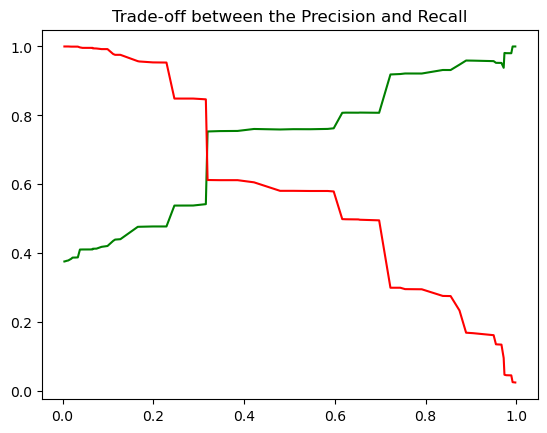

In [278]:
# plotting a trade-off curve between precision and recall
plt.title('Trade-off between the Precision and Recall')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 8.3 - Making predictions on the test set

In [279]:
# Scaling the continuous variables in the test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [280]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[featured_columns5]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7709,0,0,0,0,0,0,0,0,0,0
7125,0,0,1,0,0,0,0,0,1,0
6403,0,0,0,0,0,0,0,0,0,0
357,0,0,1,0,0,0,0,0,0,0
9082,1,0,1,1,0,0,0,0,0,0


In [281]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred

7709    0.315701
7125    0.597501
6403    0.315701
357     0.228886
9082    0.012333
          ...   
779     0.315701
2783    0.697638
1495    0.315701
8353    0.127342
7500    0.697638
Length: 2543, dtype: float64

In [282]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
7709,0.315701
7125,0.597501
6403,0.315701
357,0.228886
9082,0.012333


In [283]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [284]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,0,7709,0.315701
1,1,7125,0.597501
2,0,6403,0.315701
3,0,357,0.228886
4,0,9082,0.012333


In [285]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [286]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_Prob'])

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,7709,0,0.315701
1,7125,1,0.597501
2,6403,0,0.315701
3,357,0,0.228886
4,9082,0,0.012333


In [287]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,7709,0,0.315701,0
1,7125,1,0.597501,1
2,6403,0,0.315701,0
3,357,0,0.228886,0
4,9082,0,0.012333,0


In [288]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7778214707038931


In [289]:
# Making the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1383,  197],
       [ 368,  595]])

|Column 1     |Column 2     |Column 3 |
|:-----------:|:-----------:|:-------:|
|Predicted →  |Not Converted|Converted|      
|Actual  ↓    |             |         |
|Not Converted|1383         |197      |
|Converted    |368          |595     |

In [290]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [291]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.6117594254937163
Specificity :  0.8803672697812585
False Positive Rate : 0.11963273021874156
Positive Predictive Value : 0.7547065337763013
Negative predictive value : 0.7903030303030303


In [292]:
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead Score
0,7709,0,0.315701,0,32
1,7125,1,0.597501,1,60
2,6403,0,0.315701,0,32
3,357,0,0.228886,0,23
4,9082,0,0.012333,0,1


After running the model on the Test Data , we obtain:

- Accuracy: 77.8%
- Sensitivity: 61.2%
- Specificity: 88.03%

### Results

Comparing the values obtained for Train & Test:

Train Data:

- Accuracy: 78.01%
- Sensitivity: 60.5%
- Specificity: 88.52%

Test Data:

- Accuracy: 77.8%
- Sensitivity: 61.2%
- Specificity: 88.03%

The Model seems to predict the Conversion Rate in a decent way

## Step 9: Interpretation and conclusion

### 9.1 - Finding out the Important Features from our final model

General equation - 

$P = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}x+\beta_{2}x+...\beta_{n}x)}}\$

$ln(\frac{P}{1-P}) = \beta_{0}+\beta_{1}x+\beta_{2}x+...\beta_{n}x$

$P = e^{(\beta_{0}+\beta_{1}x+\beta_{2}x+...\beta_{n}x)}.(1-P)$

The probability that a positive (eg - lead gets converted) is $e^{(\beta_{0}+\beta_{1}x+\beta_{2}x+...\beta_{n}x)}$ that of the negative (lead doesn't get converted).

Therefore, greater the coefficient's magnitude, greater the impact and greater the importance of the feature
<br>

In [295]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.716981
What is your current occupation_Working Professional    2.549487
Last Notable Activity_Email Bounced                     2.349804
Last Notable Activity_Unreachable                       1.841706
Last Notable Activity_SMS Sent                          1.609674
Lead Source_Direct Traffic                             -0.441012
const                                                  -0.773598
Specialization_Others                                  -1.151071
Do Not Email                                           -1.301697
Last Activity_Olark Chat Conversation                  -1.435673
Last Activity_Email Bounced                            -1.866760
dtype: float64

These are the features which are significant.

### 9.2 - Finding out the leads which should be contacted

In [293]:
hot_leads=y_pred_final.loc[y_pred_final["Lead Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead Score
23,2918,1,0.874723,1,87
24,2594,1,0.972160,1,97
30,5453,1,0.950005,1,95
38,2354,1,0.874723,1,87
50,607,1,0.874723,1,87
...,...,...,...,...,...
2503,8103,1,0.874723,1,87
2505,213,1,0.874723,1,87
2512,3078,1,0.997768,1,100
2516,8073,1,0.997768,1,100


So there are 303 leads which can be contacted and have a high chance of getting converted.

In [294]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([2918, 2594, 5453, 2354,  607, 4116, 3519, 8065, 2481, 6767,  130,
       4913, 3074, 7503, 2359, 7326, 1397, 8641, 2592, 3290, 3151,  335,
       7570, 5699, 5373, 5975, 5706, 5795,  447, 8761, 7883, 4360, 5425,
        808,  318, 8267, 6977, 5791,  137, 3716, 8902, 4984, 3188, 4058,
       5697, 7253, 2770, 2025, 6156, 2140, 7566, 8183,  807, 7496, 6279,
       3542, 2687, 5576, 3447, 8490, 2797, 3187, 1783, 8062, 2380, 1263,
       2722, 1957, 1070, 3570, 1306, 7420,  785, 6538, 9049, 2090, 8213,
       2600, 7725, 8897,  475, 8052, 7776, 3176, 6375, 4862, 6015, 8755,
       2727, 1536, 4707, 5747, 4375, 3321, 1234,  839, 2762, 1709, 4589,
       4065, 4481, 2439, 7334, 5818, 1299, 4856, 4772, 7970, 3498,  513,
       4662, 8112, 7306, 1141, 7098, 7096, 7128, 3660, 4359, 3165, 2873,
       1565, 4708, 7167,   76, 2734, 4444, 7033, 8092, 4788, 4832, 2684,
       5688, 1292, 3150, 2658, 7174, 6953,  941, 3185, 8082, 1110, 1444,
       8243, 8087, 4049, 6309, 1730, 1386, 8098, 84

### 9.3 - Recommendations

- The company should make calls to the leads who are brought in through "Lead Add Form" as these are more likely to get converted.
- The company should make calls to the leads who are "working professionals" as they are more likely to get converted
- The company should make calls to the leads which are "Direct Traffic" as it is still possible that they'll convert.
- The company should not make calls to the leads whose lead origin is "Olark Chat Conversation" and last activity is "Email Bounced" as they are not likely to get converted.
- The company should not make calls to the leads whose specialization was listed under "Others" as they are not likely to get converted.
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.